# Task 6: Prediction using Decision Tree Algorithm

Create the Decision Tree classifier and visualize it graphically.<br>
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.<br>

In [44]:
# Importing the required Libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

In [4]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
# Read dataset:
df=df.drop(['Id'], axis=True)

In [14]:
# first 5 rows:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# last 5 rows:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
# no. of rows and columns:
df.shape

(150, 5)

In [17]:
# basic statistical information:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# basic summary of data and types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


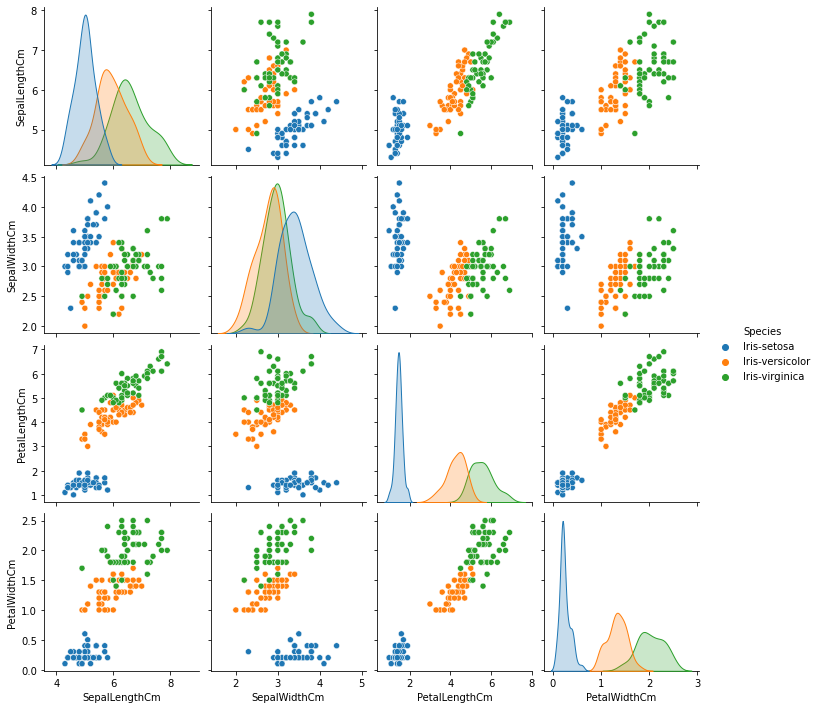

In [19]:
sns.pairplot(df, hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

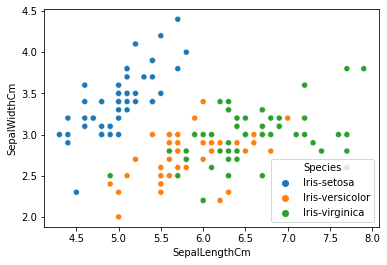

In [21]:
# Scatter plot of data based on Sepal Length and Width features:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

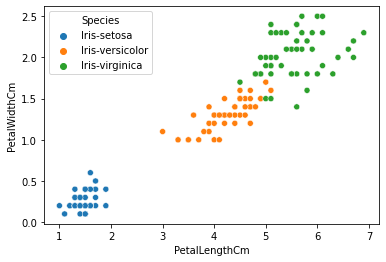

In [22]:
# Scatter plot of data based on Petal Length and Width features:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)

In [37]:
# Model Training:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)
print(y_pred)

Training Complete.
['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


In [38]:
actual=list(y_test)
predicted=list(y_pred)
compare_table = pd.DataFrame({ 'Actual':actual,'Predicted':predicted})
compare_table['status']=np.where(compare_table.Actual==compare_table.Predicted,'True','False')
print(compare_table)

             Actual        Predicted status
0    Iris-virginica   Iris-virginica   True
1   Iris-versicolor  Iris-versicolor   True
2    Iris-virginica   Iris-virginica   True
3       Iris-setosa      Iris-setosa   True
4       Iris-setosa      Iris-setosa   True
5       Iris-setosa      Iris-setosa   True
6   Iris-versicolor  Iris-versicolor   True
7   Iris-versicolor  Iris-versicolor   True
8       Iris-setosa      Iris-setosa   True
9    Iris-virginica   Iris-virginica   True
10   Iris-virginica   Iris-virginica   True
11   Iris-virginica   Iris-virginica   True
12  Iris-versicolor  Iris-versicolor   True
13   Iris-virginica   Iris-virginica   True
14  Iris-versicolor  Iris-versicolor   True
15  Iris-versicolor  Iris-versicolor   True
16   Iris-virginica   Iris-virginica   True
17  Iris-versicolor  Iris-versicolor   True
18      Iris-setosa      Iris-setosa   True
19   Iris-virginica   Iris-virginica   True
20  Iris-versicolor  Iris-versicolor   True
21      Iris-setosa      Iris-se

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'macro'))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9696969696969697
F1 Score: 0.9696342305037957


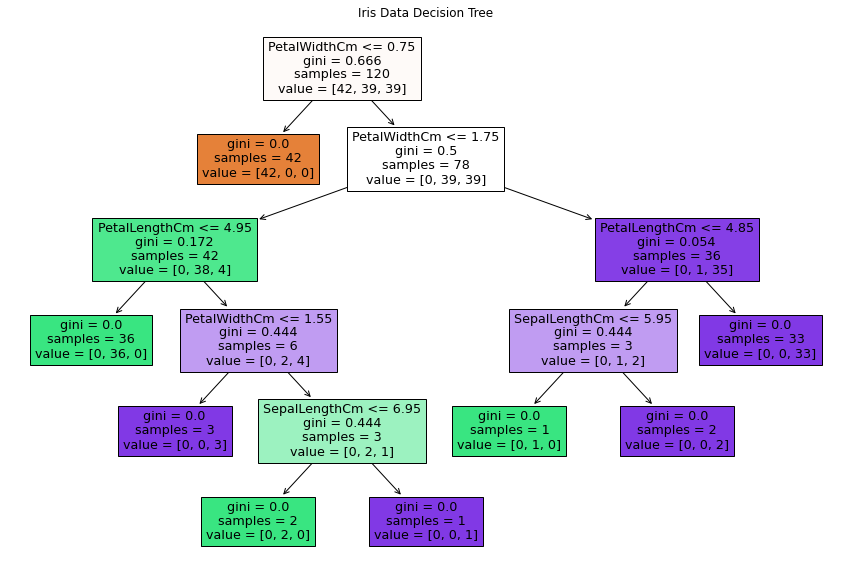

In [77]:
plt.figure(figsize = (15,10))
tree.plot_tree(tree_classifier,
               feature_names = df.iloc[:, 0:4].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()